# LOAN PREDICTION USING ENSEMBLE MODELS

## Dataset Information

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

                                    Variable             Description

                                    Loan_ID	               Unique Loan ID
                                    Gender	               Male/ Female
                                    Married                Applicant married (Y/N)
                                    Dependents             Number of dependents
                                    Education	           Applicant Education (Graduate/ Under Graduate)
                                    Self_Employed	       Self employed (Y/N)
                                    ApplicantIncome	       Applicant income
                                    CoapplicantIncome	   Coapplicant income
                                    LoanAmount	           Loan amount in thousands
                                    Loan_Amount_Term	   Term of loan in months
                                    Credit_History	       credit history meets guidelines
                                    Property_Area	       Urban/ Semi Urban/ Rural
                                    Loan_Status	           Loan approved (Y/N)

In [25]:
#import necessary libraries
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 1.Read the Dataset

In [26]:
df=pd.read_csv('train_loan.csv')

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df.shape

(614, 13)

In [29]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## 2. Data Preprocessing 


In [30]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())


In [32]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [33]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

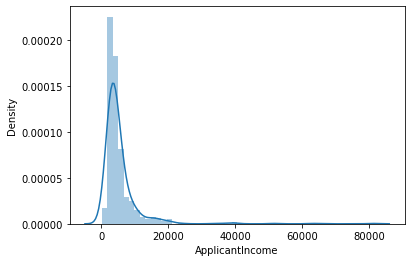

In [34]:
# numerical attributes visualization
sns.distplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

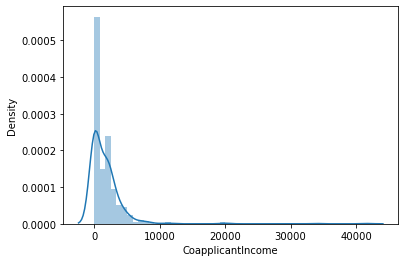

In [35]:
sns.distplot(df["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

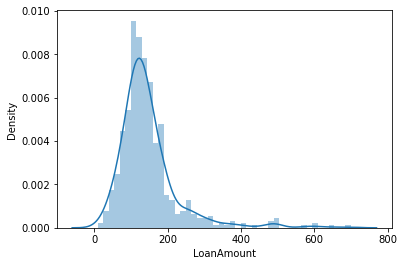

In [36]:
sns.distplot(df["LoanAmount"])


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

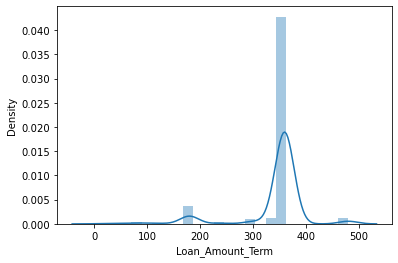

In [37]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

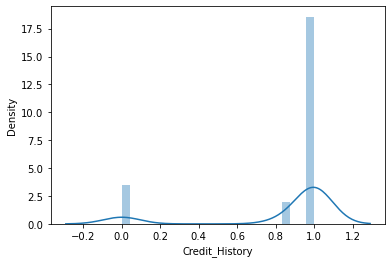

In [38]:
sns.distplot(df['Credit_History'])


<function matplotlib.pyplot.show(close=None, block=None)>

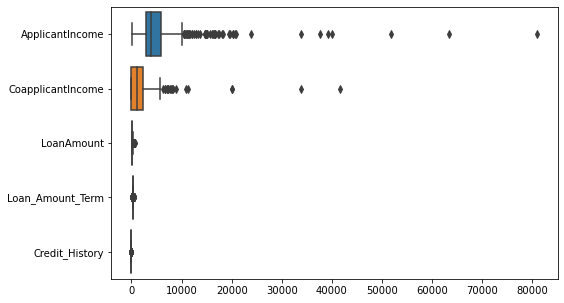

In [39]:
#finding outliers using Boxplot
plt.subplots(figsize=(8,5))
sns.boxplot(data=df,orient='h')
plt.show

In [40]:
#Removing outliers using IQR method
outliers=['ApplicantIncome','CoapplicantIncome']
ind1,ind2,i1,i2=[],[],[],[]


for i in outliers:
    print('Outliers detection and handling in',i.upper(),'COLUMN: \n')
    Q1=np.percentile(df[i],25,interpolation='midpoint')
    Q2=np.percentile(df[i],50,interpolation='midpoint')
    Q3=np.percentile(df[i],75,interpolation='midpoint')

    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    
    print('The values below',low_lim,'and above',up_lim,'are outliers.')
    
    outlier=[]
    for x in df[i]:
        if x > up_lim or x < low_lim:
            outlier.append(x)
            
    print('There are',len(outlier),'outliers in',i,'column.')
            
    ind1,ind2=df[i] > up_lim, df[i]
    i1=df.loc[ind1].index

    df.drop(i1,inplace=True)
    
    print('size after removal of outliers in',i.upper(),'column:',df.shape,'\n')

Outliers detection and handling in APPLICANTINCOME COLUMN: 

The values below -1487.5 and above 10156.5 are outliers.
There are 50 outliers in ApplicantIncome column.
size after removal of outliers in APPLICANTINCOME column: (564, 13) 

Outliers detection and handling in COAPPLICANTINCOME COLUMN: 

The values below -3507.0 and above 5845.0 are outliers.
There are 16 outliers in CoapplicantIncome column.
size after removal of outliers in COAPPLICANTINCOME column: (548, 13) 



<function matplotlib.pyplot.show(close=None, block=None)>

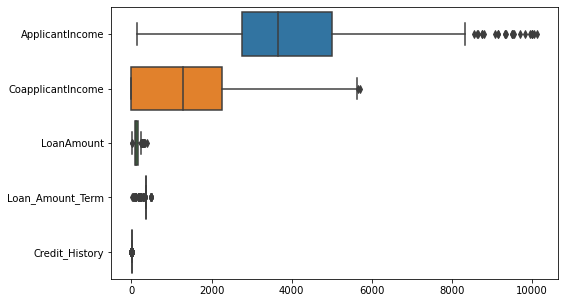

In [41]:
#finding outliers using Boxplot
plt.subplots(figsize=(8,5))
sns.boxplot(data=df,orient='h')
plt.show

#### Correlation Matrix

<AxesSubplot:>

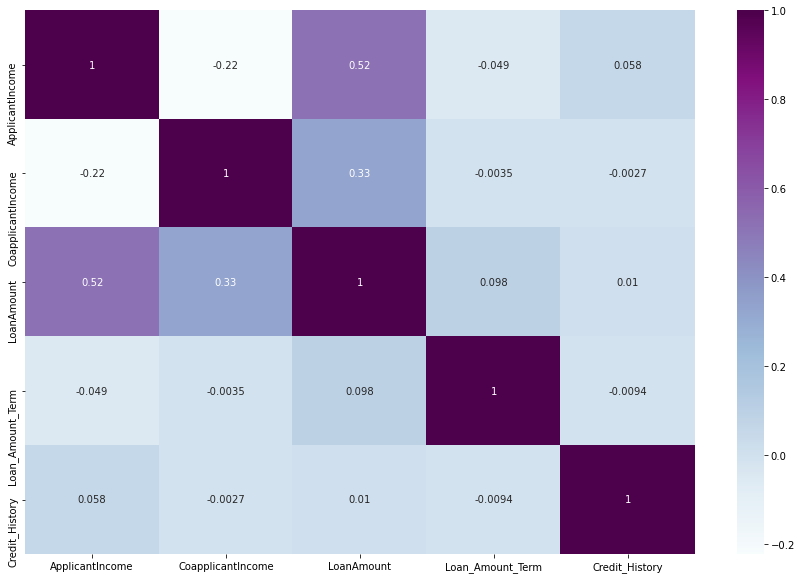

In [42]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [43]:
# drop unnecessary columns
df = df.drop('Loan_ID', axis=1)

In [44]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])


In [47]:
#One-hot encoding
#df = pd.get_dummies(data=df, 
                   # columns=
                    #['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"], 
                    #drop_first=True)
#df.head()

In [49]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


### Train-Test Split


In [50]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [52]:
print("Training set has ",x_train.shape[0], " samples.")
print("Testing set has ",x_test.shape[0], " samples.")

Training set has  411  samples.
Testing set has  137  samples.


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
scaler = StandardScaler()

scaler_train = scaler.fit_transform(x_train)

scaler_test = scaler.fit_transform(x_test)

In [58]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.metrics import classification_report
from pprint import pprint


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [59]:
models = [DecisionTreeClassifier(),KNeighborsClassifier(),  
            RandomForestClassifier(), SVC(),GradientBoostingClassifier()]


recall = []
accuracy = []
f1=[]
precision=[]


for classifier in models:
    pred = cross_val_score(classifier, x_train, y_train, scoring='recall', cv=7).mean()
    recall.append(pred)

    pred = cross_val_score(classifier, x_train, y_train, scoring='accuracy', cv=7).mean()
    accuracy.append(pred)
    
    pred = cross_val_score(classifier, x_train, y_train, scoring='precision', cv=7).mean()
    precision.append(pred)
    
    pred = cross_val_score(classifier, x_train, y_train, scoring='f1', cv=7).mean()
    f1.append(pred)
    

In [60]:
class_model = ['DecisionTreeClassifier','KNeighborsClassifier', 'SVC',
         'RandomForestClassifier','GradientBoosting']

result = pd.DataFrame({'Model': class_model, 'Accuracy': accuracy, 'Recall': recall, 'Precision':precision, 'F1score':f1})
result

,Model,Accuracy,Recall,Precision,F1score
0,DecisionTreeClassifier,0.737288,0.821690,0.793456,0.809385
1,KNeighborsClassifier,0.647366,0.839373,0.707862,0.767495
2,SVC,0.785881,0.940592,0.800409,0.858326
3,RandomForestClassifier,0.695875,1.000000,0.695875,0.820658
4,GradientBoosting,0.761459,0.901916,0.791349,0.839162


### 5. Model Tuning(Hyperparameter Tuning)

In [62]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

print('Parameters currently in use:\n')
pprint(rf.get_params())

rft=RandomForestClassifier(n_estimators=500,max_depth=1000,random_state=42,criterion='gini')
rft.fit(x_train,y_train)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


RandomForestClassifier(max_depth=1000, n_estimators=500, random_state=42)

In [64]:
pred=rft.predict(x_test)
accuracy_score(y_test,pred)
print('Accuracy score is:', accuracy_score(y_test,pred))
print('F1 score is:', f1_score(y_test,pred))

Accuracy score is: 0.8175182481751825
F1 score is: 0.878048780487805


In [77]:
parameters = [{
    "criterion": ['gini','entropy'],
    "max_depth": range(1,10),
    "min_samples_split": range(1,10), 
    "min_samples_leaf": [1,2,5,10],
             }]

dt = GridSearchCV(DecisionTreeClassifier(),
                  parameters, 
                  cv=5, n_jobs=-1,
                  scoring='f1', 
                  verbose=True)

dt.fit(x_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 10),
                          'min_samples_leaf': [1, 2, 5, 10],
                          'min_samples_split': range(1, 10)}],
             scoring='f1', verbose=True)

In [78]:
print(dt.best_params_)
print(dt.best_estimator_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=1)


In [68]:
# Decision Tree with best parameters
gs_dt = DecisionTreeClassifier(criterion='gini', 
                               max_depth= 6, 
                               min_samples_leaf=1, 
                               min_samples_split=2,)
gs_dt.fit(x_train, y_train)
gs_dt.score(x_test,y_test)

0.7956204379562044

In [69]:
pred=gs_dt.predict(x_test)
accuracy_score(y_test,pred)
print('Accuracy score is:', accuracy_score(y_test,pred))
print('F1 score is:', f1_score(y_test,pred))

Accuracy score is: 0.7956204379562044
F1 score is: 0.8627450980392157


In [74]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [76]:
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [79]:
print(cv.best_params_)
print(cv.best_estimator_)

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=50)


In [80]:
pred=cv.predict(x_test)
accuracy_score(y_test,pred)
print('Accuracy score is:', accuracy_score(y_test,pred))
print('F1 score is:', f1_score(y_test,pred))

Accuracy score is: 0.8321167883211679
F1 score is: 0.8899521531100479


In [83]:
models = [DecisionTreeClassifier(criterion='gini',max_depth= 6,min_samples_leaf=1,min_samples_split=2), 
          RandomForestClassifier(n_estimators=500,max_depth=1000,random_state=42,criterion='gini'),
          GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=50)]


recall = []
accuracy = []
f1=[]
precision=[]


for classifier in models:
    pred = cross_val_score(classifier, x_train, y_train, scoring='recall', cv=7).mean()
    recall.append(pred)

    pred = cross_val_score(classifier, x_train, y_train, scoring='accuracy', cv=7).mean()
    accuracy.append(pred)
    
    pred = cross_val_score(classifier, x_train, y_train, scoring='precision', cv=7).mean()
    precision.append(pred)
    
    pred = cross_val_score(classifier, x_train, y_train, scoring='f1', cv=7).mean()
    f1.append(pred)
    

In [84]:
class_model = ['DecisionTreeClassifier',
         'RandomForestClassifier','GradientBoosting']

result = pd.DataFrame({'Model': class_model, 'Accuracy': accuracy, 'Recall': recall, 'Precision':precision, 'F1score':f1})
result

,Model,Accuracy,Recall,Precision,F1score
0,DecisionTreeClassifier,0.780830,0.926220,0.791263,0.852901
1,RandomForestClassifier,0.790724,0.933537,0.799943,0.861095
2,GradientBoosting,0.815104,0.986063,0.797141,0.881333


In [72]:
model = RandomForestClassifier(n_estimators=500,max_depth=1000,random_state=42,criterion='gini')
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=1000, n_estimators=500, random_state=42)

In [73]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[22, 21],
       [ 4, 90]], dtype=int64)